In [289]:
import pandas as pd
import numpy as np

In [290]:
low_memory = False
df=pd.read_csv("census2011.csv")
df[['Person ID','Family Composition', 'Population Base', 'Sex', 'Age',
    'Marital Status','Student', 'Country of Birth', 'Health', 'Ethnic Group',
    'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week', 'Approximated Social Grade']]= df[['Person ID','Family Composition', 'Population Base', 'Sex', 'Age',
    'Marital Status','Student', 'Country of Birth', 'Health', 'Ethnic Group',
    'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week', 'Approximated Social Grade']].apply(pd.to_numeric, errors='coerce')

In [291]:
df

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
5,7394750,E12000001,H,2,1,1,6,2,2,1,2,1,1,1,9,2,3,3
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
7,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
8,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
9,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4


In [292]:
len(df)

569742

In [293]:
df.dtypes

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object

In [294]:
refinedData = df.copy()

In [295]:
refinedData = refinedData.dropna()
pd.options.display.float_format = '{:,.0f}'.format
refinedData

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
5,7394750,E12000001,H,2,1,1,6,2,2,1,2,1,1,1,9,2,3,3
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
7,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
8,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
9,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4


In [296]:
refinedData = refinedData.drop_duplicates()

In [297]:
regions = ["E12000001","E12000002","E12000003","E12000004","E12000005","E12000006","E12000007","E12000008","E12000009","W92000004"]
residenceType = ["C","H"]
famComp = [1,2,3,4,5,6,-9]
popBase = [1,2,3]
sex = [1,2]
age = [1,2,3,4,5,6,7,8]
maritalStatus = [1,2,3,4,5]
student = [1,2]
countryOfBirth = [1,2,-9]
health = [1,2,3,4,5,-9]
ethnicGroup = [1,2,3,4,5,-9]
religion = [1,2,3,4,5,6,7,8,9,-9]
econActivity = [1,2,3,4,5,6,7,8,9,-9]
occupation = [1,2,3,4,5,6,7,8,9,-9]
industry = [1,2,3,4,5,6,7,8,9,10,11,12,-9]
hoursWorkPerWeek = [1,2,3,4,-9]
approxSocialGrade = [1,2,3,4,-9]

rowsToRemove = []

rCounter = 0
regs = refinedData['Region']
for reg in regs:
    flag = 1
    for region in regions:
                if region == reg:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
res = refinedData['Residence Type']  
for r in res:
    flag = 1
    for resType in residenceType:
                if resType == r:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
family = refinedData['Family Composition']  
for comp in family:
    flag = 1
    for f in famComp:
                if f == comp:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
population = refinedData['Population Base']  
for base in population:
    flag = 1
    for pop in popBase:
                if pop == base:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
gender = refinedData['Sex']  
for g in gender:
    flag = 1
    for gend in sex:
                if gend == g:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
ageRange = refinedData['Age']  
for rangee in ageRange:
    flag = 1
    for agee in age:
                if agee == rangee:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
mStatus = refinedData['Marital Status']  
for m in mStatus:
    flag = 1
    for married in maritalStatus:
                if married == m:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
studs = refinedData['Student']  
for stud in studs:
    flag = 1
    for isStud in student:
                if isStud == stud:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
births = refinedData['Country of Birth']  
for bir in births:
    flag = 1
    for country in countryOfBirth:
                if country == bir:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
healths = refinedData['Health']  
for heal in healths:
    flag = 1
    for he in health:
                if he == heal:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
ethnics = refinedData['Ethnic Group']  
for ethnic in ethnics:
    flag = 1
    for eth in ethnicGroup:
                if eth == ethnic:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
religions = refinedData['Religion']  
for rel in religions:
    flag = 1
    for reli in religion:
                if reli == rel:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
economics = refinedData['Economic Activity']  
for economic in economics:
    flag = 1
    for econ in econActivity:
                if econ == economic:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
occupations = refinedData['Occupation']  
for oc in occupations:
    flag = 1
    for occup in occupation:
                if occup == oc:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    if rCounter >200:
        break

rCounter = 0
industries = refinedData['Industry']  
for indust in industries:
    flag = 1
    for ind in industry:
                if ind == indust:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
hoursWorked = refinedData['Hours worked per week']  
for hours in hoursWorked:
    flag = 1
    for work in hoursWorkPerWeek:
                if work == hours:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
grades = refinedData['Approximated Social Grade']  
for grade in grades:
    flag = 1
    for approx in approxSocialGrade:
                if approx == grade:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rowsToRemove.sort(reverse=True)

for i in rowsToRemove:
    refinedData = refinedData.drop(refinedData.index[[i]])

refinedData


,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
5,7394750,E12000001,H,2,1,1,6,2,2,1,2,1,1,1,9,2,3,3
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
7,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
8,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
9,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4


In [298]:
len(refinedData)

569741

In [299]:
refinedData.dtypes

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object

In [300]:
region = refinedData.groupby('Region')
region.size()

Region
E12000001    26349
E12000002    71436
E12000003    53471
E12000004    45782
E12000005    56875
E12000006    59411
E12000007    83582
E12000008    88084
E12000009    53774
W92000004    30977
dtype: int64

In [301]:
residenceType = refinedData.groupby('Residence Type')
residenceType.size()

Residence Type
C     10654
H    559087
dtype: int64

In [302]:
familyComposition = refinedData.groupby('Family Composition')
familyComposition.size()

Family Composition
-9     18851
 1     96690
 2    300962
 3     72641
 4      9848
 5     64519
 6      6230
dtype: int64

In [303]:
populationBase = refinedData.groupby('Population Base')
populationBase.size()

Population Base
1    561040
2      6730
3      1971
dtype: int64

In [304]:
sex = refinedData.groupby('Sex')
sex.size()

Sex
1    280569
2    289172
dtype: int64

In [305]:
age = refinedData.groupby('Age')
age.size()

Age
1    106832
2     72785
3     75948
4     78641
5     77388
6     65666
7     48777
8     43704
dtype: int64

In [306]:
maritalStatus = refinedData.groupby('Marital Status')
maritalStatus.size()

Marital Status
1    270999
2    214180
3     11951
4     40713
5     31898
dtype: int64

In [307]:
student = refinedData.groupby('Student')
student.size()

Student
1    126537
2    443204
dtype: int64

In [308]:
countryOfBirth = refinedData.groupby('Country of Birth')
countryOfBirth.size()

Country of Birth
-9      6804
 1    485645
 2     77292
dtype: int64

In [309]:
health = refinedData.groupby('Health')
health.size()

Health
-9      6804
 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
dtype: int64

In [310]:
ethnicGroup = refinedData.groupby('Ethnic Group')
ethnicGroup.size()

Ethnic Group
-9      6804
 1    483477
 2     12209
 3     42712
 4     18786
 5      5753
dtype: int64

In [311]:
religion = refinedData.groupby('Religion')
religion.size()

Religion
-9      6804
 1    141658
 2    333481
 3      2538
 4      8214
 5      2572
 6     27240
 7      4215
 8      2406
 9     40613
dtype: int64

In [312]:
economicActivity = refinedData.groupby('Economic Activity')
economicActivity.size()

Economic Activity
-9    112618
 1    216025
 2     40632
 3     18109
 4     14117
 5     97480
 6     24756
 7     17945
 8     17991
 9     10068
dtype: int64

In [313]:
occupation = refinedData.groupby('Occupation')
occupation.size()

Occupation
-9    149984
 1     39788
 2     64111
 3     44937
 4     53254
 5     48546
 6     37297
 7     38523
 8     34818
 9     58483
dtype: int64

In [314]:
industry = refinedData.groupby('Industry')
industry.size()

Industry
-9     149984
 1       3957
 2      53433
 3      30708
 4      68878
 5      25736
 6      35240
 7      16776
 8      49960
 9      24908
 10     40560
 11     49345
 12     20256
dtype: int64

In [315]:
hoursWorkedPerWeek = refinedData.groupby('Hours worked per week')
hoursWorkedPerWeek.size()

Hours worked per week
-9    302321
 1     25776
 2     52133
 3    153938
 4     35573
dtype: int64

In [316]:
approximatedSocialGrade = refinedData.groupby('Approximated Social Grade')
approximatedSocialGrade.size()

Approximated Social Grade
-9    124103
 1     82320
 2    159642
 3     79936
 4    123740
dtype: int64

In [317]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
%matplotlib inline

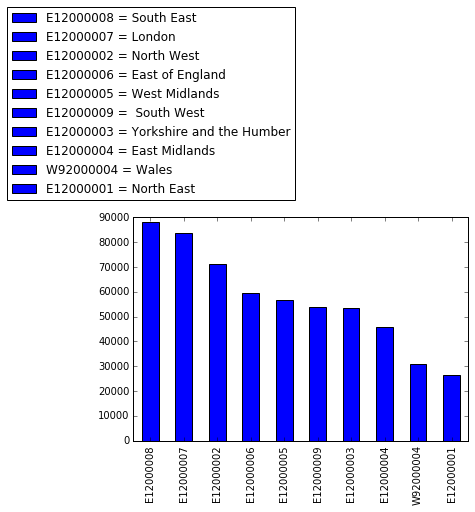

In [318]:
refinedData['Region'].value_counts().plot(kind="bar")

region1_patch = patch.Patch(label='E12000008 = South East')
region2_patch = patch.Patch(label='E12000007 = London')
region3_patch = patch.Patch(label='E12000002 = North West')
region4_patch = patch.Patch(label='E12000006 = East of England')
region5_patch = patch.Patch(label='E12000005 = West Midlands')
region6_patch = patch.Patch(label='E12000009 =  South West')
region7_patch = patch.Patch(label='E12000003 = Yorkshire and the Humber')
region8_patch = patch.Patch(label='E12000004 = East Midlands')
region9_patch = patch.Patch(label='W92000004 = Wales')
region10_patch = patch.Patch(label='E12000001 = North East')

plt.legend(handles=[region1_patch,region2_patch,region3_patch,region4_patch,region5_patch,region6_patch,region7_patch,region8_patch,region9_patch,region10_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

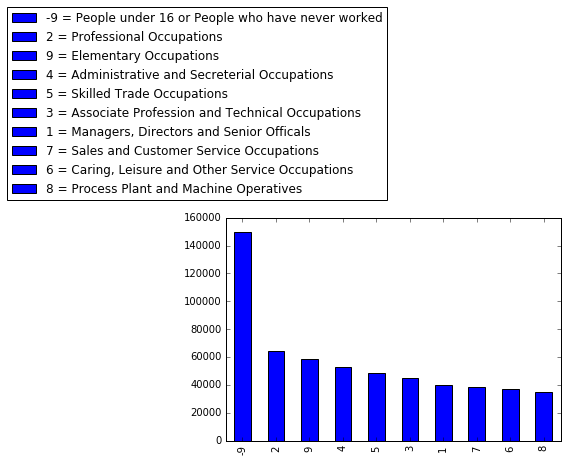

In [319]:
refinedData['Occupation'].value_counts().plot(kind="bar")

occupation1_patch = patch.Patch(label='-9 = People under 16 or People who have never worked')
occupation2_patch = patch.Patch(label='2 = Professional Occupations')
occupation3_patch = patch.Patch(label='9 = Elementary Occupations')
occupation4_patch = patch.Patch(label='4 = Administrative and Secreterial Occupations')
occupation5_patch = patch.Patch(label='5 = Skilled Trade Occupations')
occupation6_patch = patch.Patch(label='3 = Associate Profession and Technical Occupations')
occupation7_patch = patch.Patch(label='1 = Managers, Directors and Senior Officals')
occupation8_patch = patch.Patch(label='7 = Sales and Customer Service Occupations')
occupation9_patch = patch.Patch(label='6 = Caring, Leisure and Other Service Occupations')
occupation10_patch = patch.Patch(label='8 = Process Plant and Machine Operatives')

plt.legend(handles=[occupation1_patch,occupation2_patch,occupation3_patch,occupation4_patch,occupation5_patch,occupation6_patch,occupation7_patch,occupation8_patch,occupation9_patch,occupation10_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

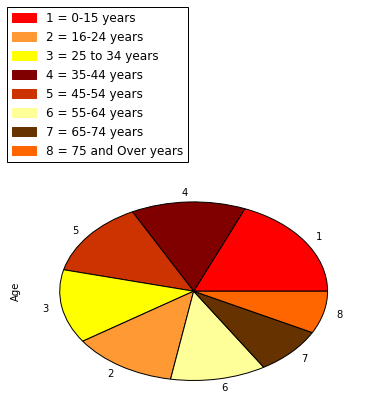

In [320]:
colors = ['#ff0000', '#800000', '#cc3300', '#ffff00', '#ff9933', '#ffff99', '#663300', '#ff6600']
    
refinedData['Age'].value_counts().plot(kind="pie", colors = colors)

five_patch = patch.Patch(color='#cc3300', label='5 = 45-54 years')
four_patch = patch.Patch(color='#800000', label='4 = 35-44 years')
two_patch = patch.Patch(color='#ff9933', label='2 = 16-24 years')
six_patch = patch.Patch(color='#ffff99', label='6 = 55-64 years')
seven_patch = patch.Patch(color='#663300', label='7 = 65-74 years')
one_patch = patch.Patch(color='#ff0000', label='1 = 0-15 years')
eight_patch = patch.Patch(color='#ff6600', label='8 = 75 and Over years')
three_patch = patch.Patch(color='#ffff00', label='3 = 25 to 34 years')

plt.legend(handles=[one_patch, two_patch, three_patch, four_patch, five_patch, six_patch, seven_patch, eight_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

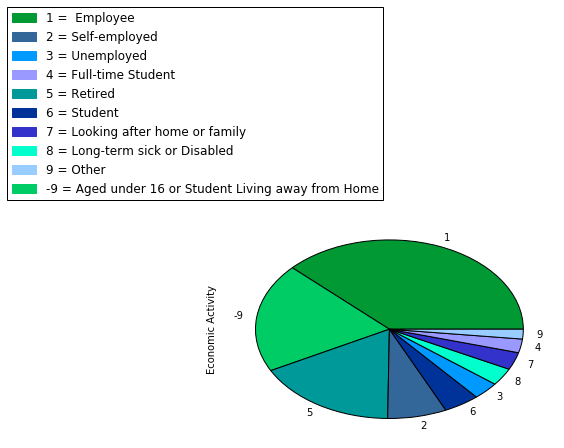

In [321]:
colors = ['#009933', '#00cc66', '#009999', '#336699', '#003399', '#0099ff', '#00ffcc', '#3333cc', '#9999ff', '#99ccff']
refinedData['Economic Activity'].value_counts().plot(kind="pie", colors = colors)

five_patch = patch.Patch(color='#009999', label='5 = Retired')
minusnine_patch = patch.Patch(color='#00cc66', label='-9 = Aged under 16 or Student Living away from Home')
six_patch = patch.Patch(color='#003399', label='6 = Student')
three_patch = patch.Patch(color='#0099ff', label='3 = Unemployed')
eight_patch = patch.Patch(color='#00ffcc', label='8 = Long-term sick or Disabled')
one_patch = patch.Patch(color='#009933', label='1 =  Employee')
seven_patch = patch.Patch(color='#3333cc', label='7 = Looking after home or family')
four_patch = patch.Patch(color='#9999ff', label='4 = Full-time Student')
nine_patch = patch.Patch(color='#99ccff', label='9 = Other')
two_patch = patch.Patch(color='#336699', label = '2 = Self-employed')

plt.legend(handles=[one_patch, two_patch, three_patch, four_patch, five_patch, six_patch, seven_patch, eight_patch, nine_patch, minusnine_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

In [322]:
byRegionAndIndustry = refinedData[['Region', 'Industry']].copy()
byRegionAndIndustry = byRegionAndIndustry.groupby(['Region', 'Industry']).size()
byRegionAndIndustry.reset_index(name='Count')

,Region,Industry,Count
0,E12000001,-9,6854
1,E12000001,1,132
2,E12000001,2,2851
3,E12000001,3,1574
4,E12000001,4,3087
5,E12000001,5,1300
6,E12000001,6,1438
7,E12000001,7,524
8,E12000001,8,1883
9,E12000001,9,1498


In [323]:
byOccupationAndSocialGrade = refinedData[['Occupation', 'Approximated Social Grade']].copy()
byOccupationAndSocialGrade = byOccupationAndSocialGrade.groupby(['Occupation', 'Approximated Social Grade']).size()
byOccupationAndSocialGrade.reset_index(name='Count')

,Occupation,Approximated Social Grade,Count
0,-9,-9,116915
1,-9,1,1051
2,-9,2,17787
3,-9,3,2062
4,-9,4,12169
5,1,-9,492
6,1,1,19190
7,1,2,18555
8,1,3,584
9,1,4,967


In [324]:
data = refinedData[(refinedData['Economic Activity'] < 5) & (refinedData['Economic Activity']>-1)]

byRegionAndEconomicActivity = data[['Region', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Region']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Region,Count
0,E12000001,12897
1,E12000002,35204
2,E12000003,26843
3,E12000004,23106
4,E12000005,27930
5,E12000006,30568
6,E12000007,44454
7,E12000008,45551
8,E12000009,27453
9,W92000004,14877


In [325]:
data = refinedData[(refinedData['Economic Activity'] < 5) & (refinedData['Economic Activity']>-1)]

byRegionAndEconomicActivity = data[['Age', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Age']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Age,Count
0,2,41663
1,3,64326
2,4,67050
3,5,65736
4,6,40584
5,7,8022
6,8,1502


In [326]:
data = refinedData[((refinedData['Student'] == 1) & 
                   ((refinedData['Economic Activity'] != 4 ) &
                   (refinedData['Economic Activity'] != 6 ) &
                   (refinedData['Economic Activity'] != -9 ))) |
                   ((refinedData['Student'] == 2) & 
                   ((refinedData['Economic Activity'] == 4 ) &
                   (refinedData['Economic Activity'] == 6 ) &
                   (refinedData['Economic Activity'] == -9 )))]
data

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade


In [327]:
data = refinedData[(refinedData['Economic Activity'] == 4) | (refinedData['Economic Activity'] == 6)]

byRegionAndEconomicActivity = data[['Hours worked per week', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Hours worked per week']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Hours worked per week,Count
0,-9,28110
1,1,6465
2,2,2334
3,3,1683
4,4,281


AttributeError: 'function' object has no attribute 'setIndex'

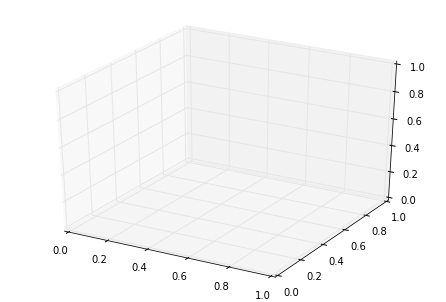

In [328]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# byOccupationAndSocialGrade.plot(kind="bar")

fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)


byOccupationAndSocialGrade = refinedData[['Occupation', 'Approximated Social Grade']].copy()
byOccupationAndSocialGrade = byOccupationAndSocialGrade.groupby(['Occupation', 'Approximated Social Grade']).size()
byOccupationAndSocialGrade = byOccupationAndSocialGrade.to_frame
byOccupationAndSocialGrade.setIndex(['Occupation', 'Approximated Social Grade', 'Count'])


x = byOccupationAndSocialGrade['Occupation']
y = byOccupationAndSocialGrade['Approximated Social Grade']
z = refinedData.groupby(['Occupation', 'Approximated Social Grade']).count()#median().index.get_level_values('Occupation')

# Z = byOccupationAndSocialGrade.index.get_level_values('Count')


# ax.plot_wireframe(X,Y,Z)
#ax.plot_trisurf(X, Y, Z)
#plt.title("Occupation and Approximated Social Grade")
#plt.show()






verts = [zip(x, y,z)]
ax.add_collection3d(Poly3DCollection(verts))
plt.title("Occupation and Approximated Social Grade")
plt.show()



